In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('house_data_ultimate_cleaned', index_col='Unnamed: 0')

In [3]:
df.head()

,Area,Price,State_of_building,Facades,Bedrooms,Kitchen,Furnished,Open_fire,Zip_code,Land_surface,Terrace,Terrace_surface,Swimming_pool,Subtype_property,Garden,Garden_surface,Regions,Price_per_square_meter
0,123.0,200000,Good,3.0,2.0,Installed,No,No,3294,429.0,No,0,No,house,Yes,350,Flanders,1626.02
1,255.0,698000,Just renovated,4.0,4.0,Installed,No,No,2070,1210.0,No,0,No,villa,No,0,Flanders,2737.25
2,234.0,499000,As new,NaN,5.0,NaN,No,No,8800,744.0,No,0,No,villa,No,0,Flanders,2132.48
3,219.0,717000,As new,NaN,4.0,NaN,No,No,8000,760.0,No,0,No,house,No,0,Flanders,3273.97
4,156.0,429000,Good,4.0,4.0,Installed,No,No,8800,419.0,No,0,No,villa,Yes,90,Flanders,2750.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 0 to 8332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    7801 non-null   float64
 1   Price                   7801 non-null   int64  
 2   State_of_building       5889 non-null   object 
 3   Facades                 6256 non-null   float64
 4   Bedrooms                7746 non-null   float64
 5   Kitchen                 5601 non-null   object 
 6   Furnished               7801 non-null   object 
 7   Open_fire               7801 non-null   object 
 8   Zip_code                7801 non-null   int64  
 9   Land_surface            7801 non-null   float64
 10  Terrace                 7801 non-null   object 
 11  Terrace_surface         7801 non-null   int64  
 12  Swimming_pool           7801 non-null   object 
 13  Subtype_property        7801 non-null   object 
 14  Garden                  7801 non-null   

In [133]:
print('Some statistics of the house price:')
print(df['Price'].describe())
print()
print('House price median')
print(df['Price'].median())

Some statistics of the house price:
count    7.801000e+03
mean     4.712033e+05
std      4.385355e+05
min      2.500000e+03
25%      2.490000e+05
50%      3.390000e+05
75%      4.990000e+05
max      3.000000e+06
Name: Price, dtype: float64

House price median
339000.0


In [137]:
corr=df.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price                     1.000000
Price_per_square_meter    0.638335
Area                      0.513989
Bedrooms                  0.441721
Facades                   0.263788
Land_surface              0.135736
Garden_surface            0.055409
Terrace_surface           0.018380
Zip_code                 -0.272808
Name: Price, dtype: float64

Text(0, 0.5, 'Freqency')

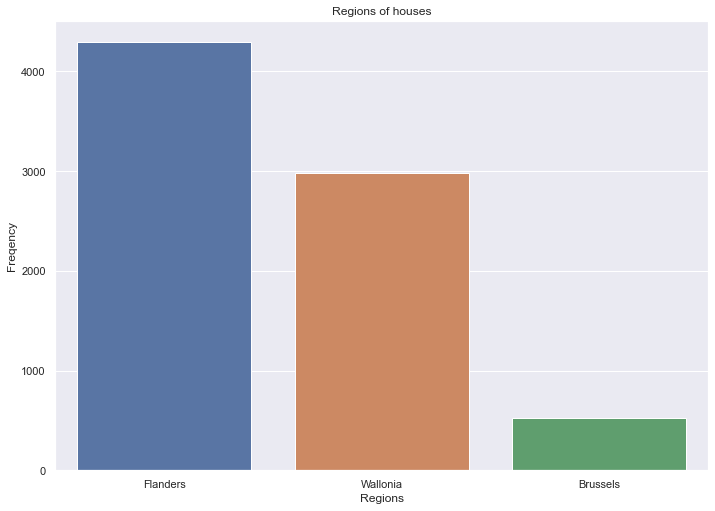

In [131]:
sns.countplot(data=df, x="Regions")
plt.title('Regions of houses')
plt.ylabel('Freqency')

(0.0, 2000000.0)

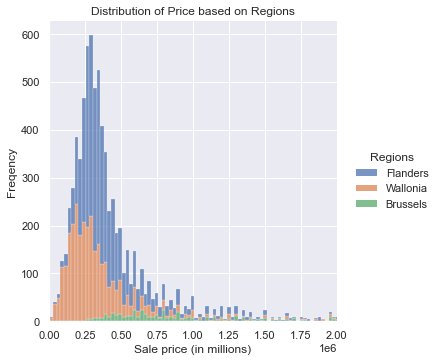

In [140]:
d = sns.displot(data=df, x="Price", hue="Regions", multiple="stack")
plt.title('Distribution of Price based on Regions')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 2000000)

(0.0, 1000000.0)

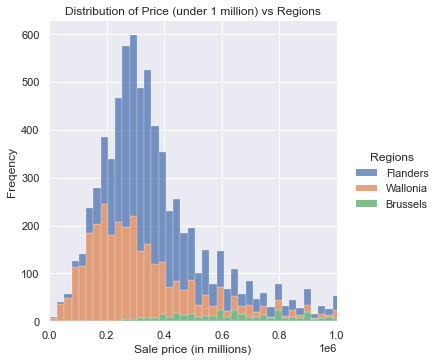

In [141]:
sns.displot(data=df, x="Price", hue="Regions", multiple="stack")
plt.title('Distribution of Price (under 1 million) vs Regions')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 1000000)

(0.0, 5000.0)

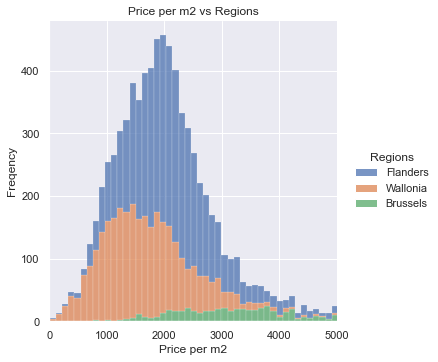

In [10]:
sns.displot(data=df, x='Price_per_square_meter', hue="Regions", multiple="stack")
plt.title('Price per m2 vs Regions')
plt.xlabel('Price per m2')
plt.ylabel('Freqency')
plt.xlim(0, 5000)

(0.0, 700.0)

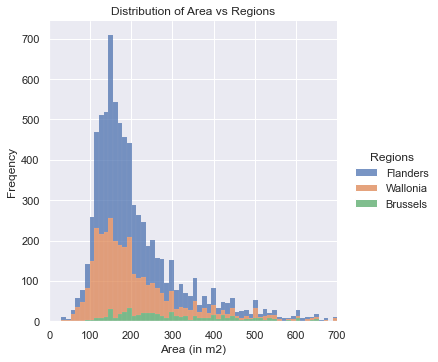

In [142]:
sns.displot(data=df, x='Area', hue="Regions", multiple="stack")
plt.title('Distribution of Area vs Regions')
plt.xlabel('Area (in m2)')
plt.ylabel('Freqency')
plt.xlim(0, 700)

Text(0.5, 1.0, 'Numeric Feature heatmap')

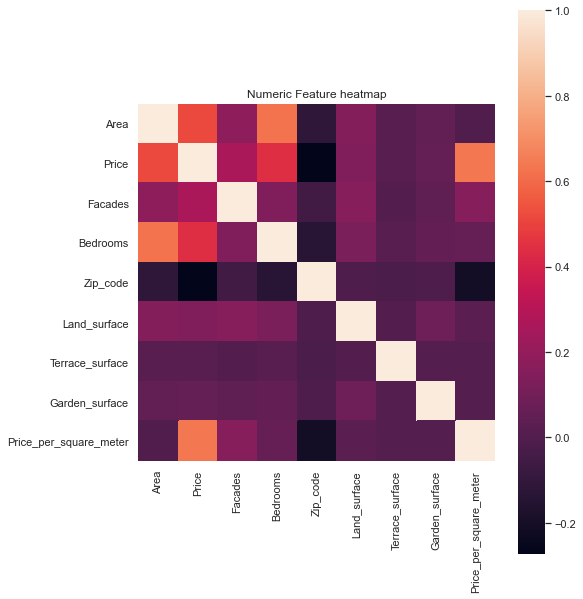

In [16]:
fig,ax = plt.subplots(figsize=(8,10))
correlation = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

Text(0, 0.5, 'Sale Price')

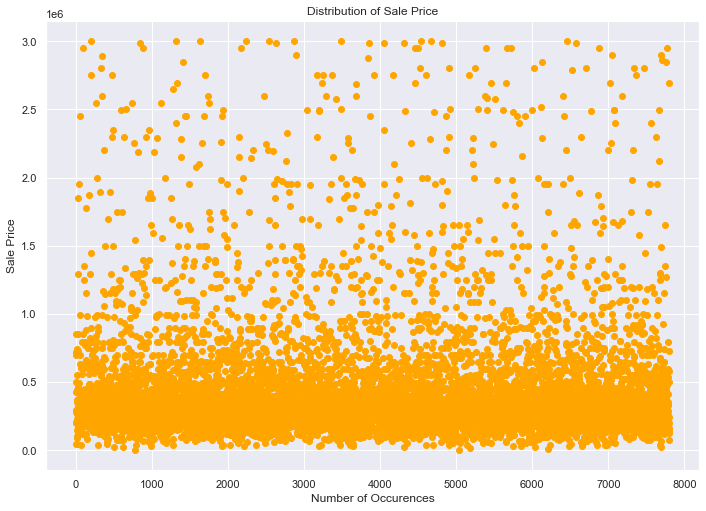

In [145]:
plt.scatter(range(df.shape[0]), df["Price"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

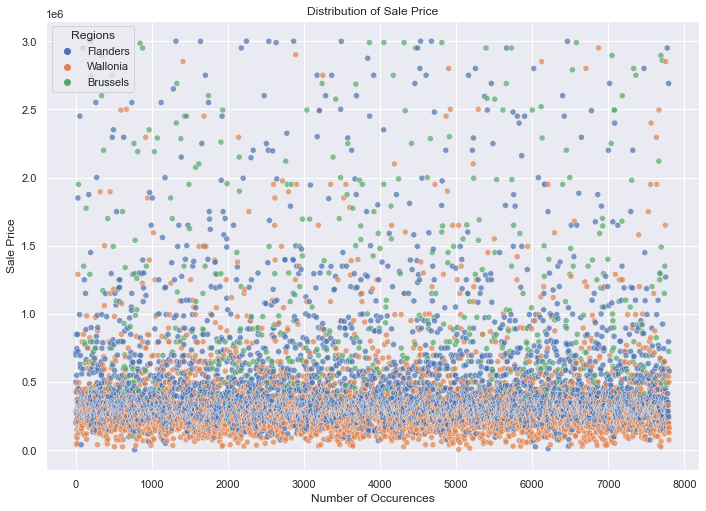

In [152]:
sns.scatterplot(data=df, x=range(df.shape[0]), y="Price", hue="Regions", alpha=.7)
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price")

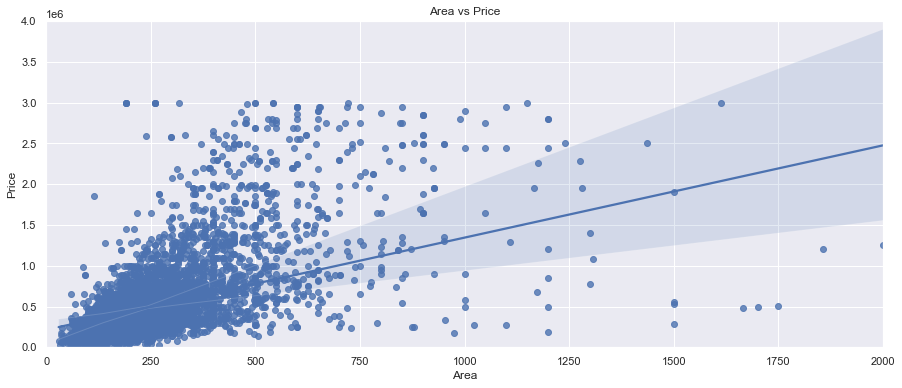

In [17]:
fig,ax = plt.subplots(figsize=(15,6))
sns.regplot(x = 'Area', y='Price' , data=df,ax=ax)
plt.ylim(0, 4000000)
plt.xlim(0, 2000)
plt.title('Area vs Price') 
plt.show()

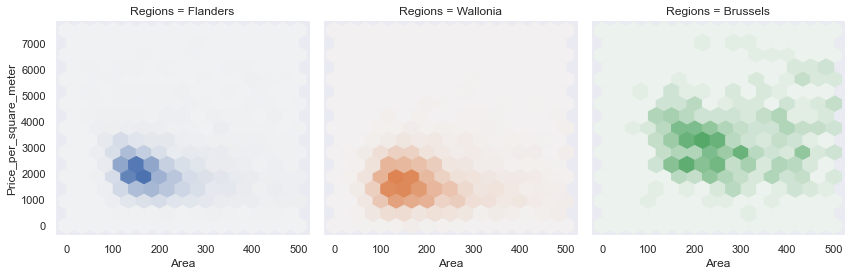

In [18]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df, hue= 'Regions', col="Regions", height=4)
g.map(hexbin, "Area", "Price_per_square_meter", extent=[0, 500, 0, 7500]);

Text(875.224375, 0.5, 'Freqency')

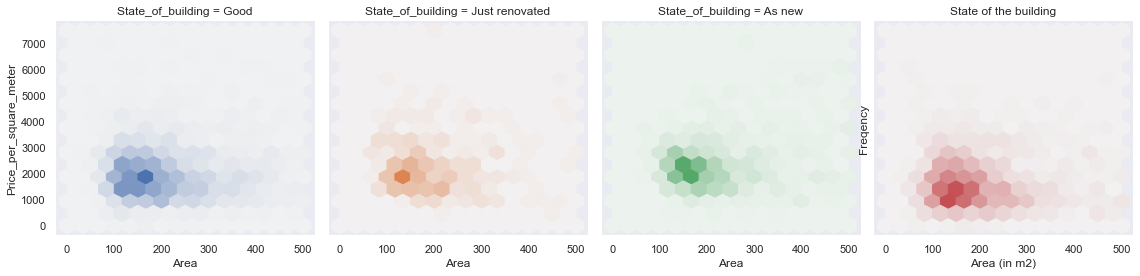

In [19]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df, hue= 'State_of_building', col='State_of_building', height=4)
g.map(hexbin, "Area", "Price_per_square_meter", extent=[0, 500, 0, 7500]);
plt.title('State of the building')
plt.xlabel('Area (in m2)')
plt.ylabel('Freqency')

(0.0, 5000.0)

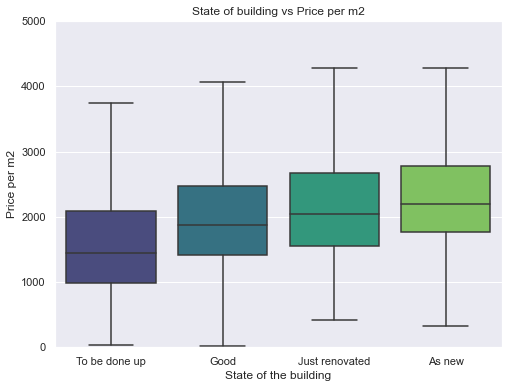

In [22]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'State_of_building', y = 'Price_per_square_meter',  data = df,ax=ax, order=["To be done up", "Good", "Just renovated", "As new"], palette= "viridis", showfliers = False)
plt.title('State of building vs Price per m2')
plt.xlabel('State of the building')
plt.ylabel('Price per m2')
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.ylim(0, 5000)

(0.0, 1500000.0)

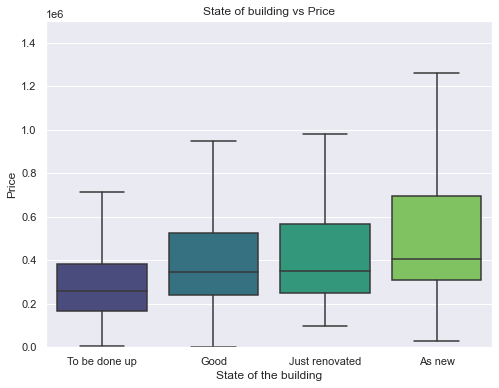

In [62]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'State_of_building', y = 'Price',  data = df,ax=ax, order=["To be done up", "Good", "Just renovated", "As new"], palette= "viridis", showfliers = False)
plt.title('State of building vs Price')
plt.xlabel('State of the building')
plt.ylabel('Price')
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.ylim(0, 1500000)

(0.0, 7000.0)

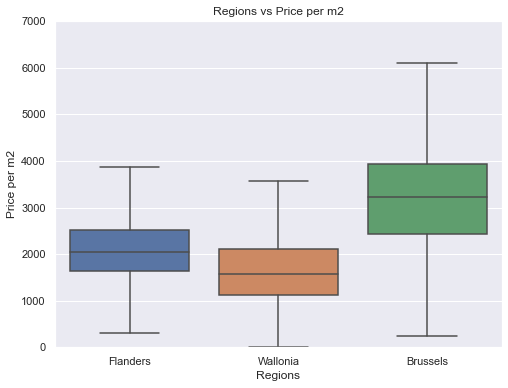

In [24]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price_per_square_meter',  data = df,ax=ax, showfliers = False)
plt.title('Regions vs Price per m2')
plt.xlabel('Regions')
plt.ylabel('Price per m2')
plt.ylim(0, 7000)

Text(0, 0.5, 'Price (in millions)')

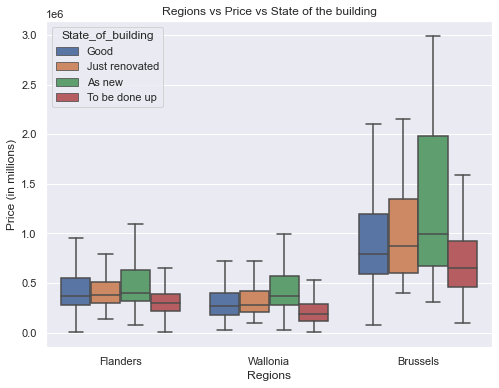

In [125]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price',  data = df,ax=ax, hue='State_of_building',showfliers = False)
plt.title('Regions vs Price vs State of the building')
plt.xlabel('Regions')
plt.ylabel('Price (in millions)')
#plt.ylim(0, 3000000)

Text(0, 0.5, 'Price per m2')

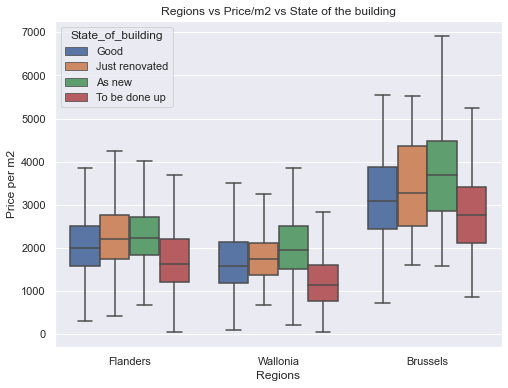

In [123]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price_per_square_meter',  data = df,ax=ax, hue='State_of_building',showfliers = False)
plt.title('Regions vs Price/m2 vs State of the building')
plt.xlabel('Regions')
plt.ylabel('Price per m2')
#plt.ylim(0, 3000000)

Text(0, 0.5, 'Area (in m2)')

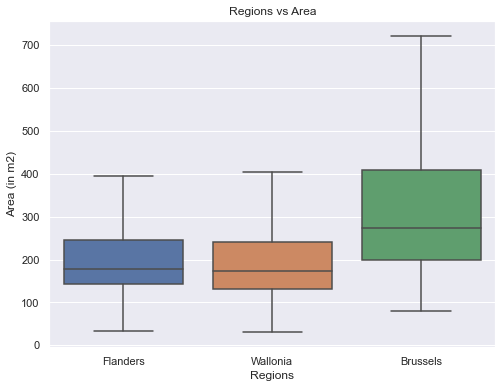

In [127]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Area',  data = df,ax=ax,showfliers = False)
plt.title('Regions vs Area')
plt.xlabel('Regions')
plt.ylabel('Area (in m2)')
#plt.ylim(0, 2800000)

Text(0, 0.5, 'Garden surface')

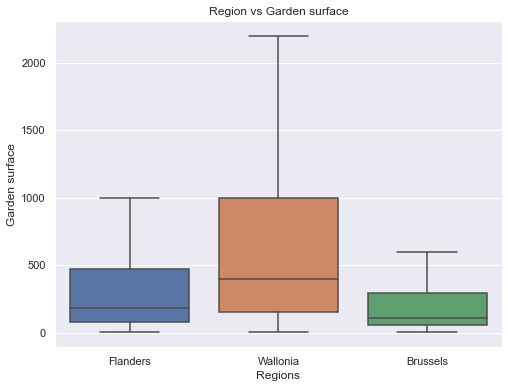

In [129]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Garden_surface',  data = df_garden,ax=ax,showfliers = False)
plt.title('Region vs Garden surface')
plt.xlabel('Regions')
plt.ylabel('Garden surface')
#plt.ylim(0, 2800000)

Text(0.5, 1.0, 'Garden vs Price')

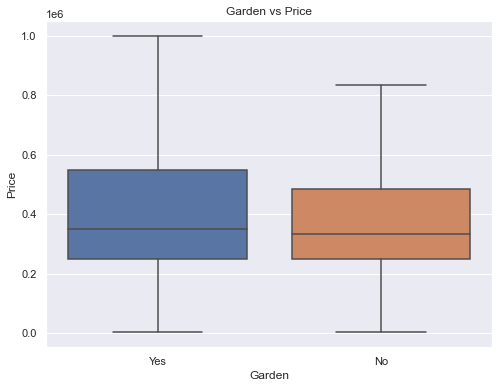

In [28]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Garden', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Garden vs Price')

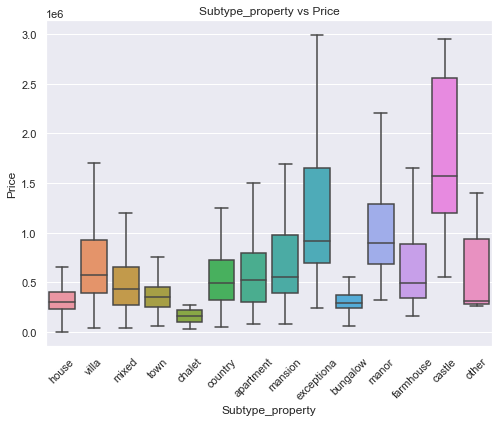

In [50]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Subtype_property', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Subtype_property vs Price')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

Text(0.5, 1.0, 'Is having a swimming pool linked to a higher price?')

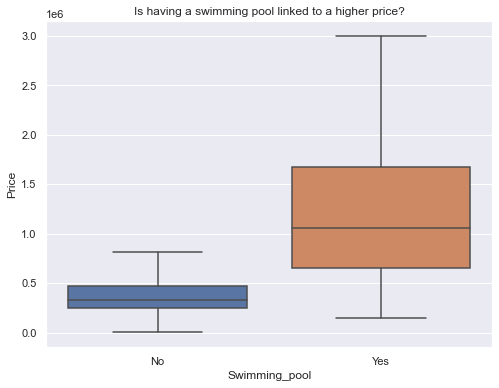

In [65]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Swimming_pool', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Is having a swimming pool linked to a higher price?')

Text(0.5, 1.0, 'Is fursnihed linked to a higher price?')

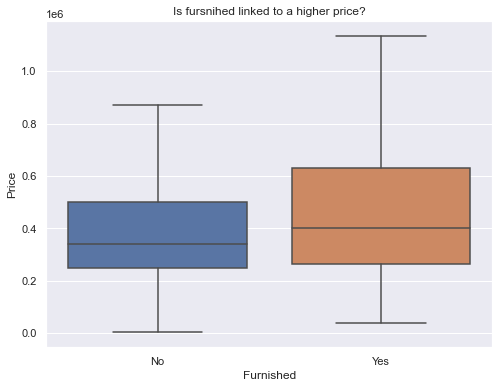

In [64]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Furnished', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Is fursnihed linked to a higher price?')

Text(0.5, 1.0, 'Is having an open-fire linked to a higher price?')

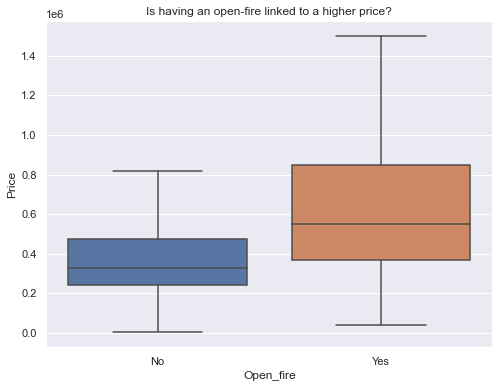

In [63]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Open_fire', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Is having an open-fire linked to a higher price?')

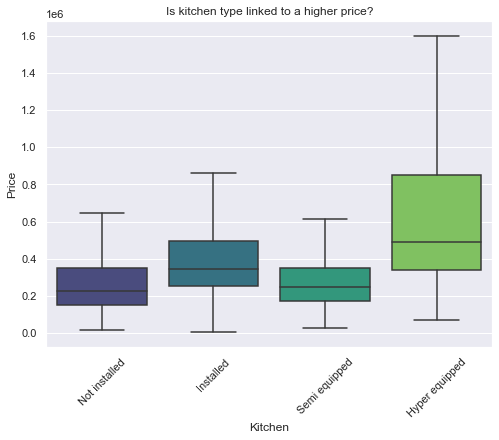

In [49]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Kitchen', y = 'Price',  data = df,ax=ax, order=["Not installed", "Installed", "Semi equipped", "Hyper equipped"], palette= "viridis", showfliers = False)
plt.title('Is kitchen type linked to a higher price?')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)